# Chapter 24 - Exercises

In [40]:
import math
from scipy.stats import t
import scipy.stats
import numpy as np

from statistics import stdev, mean
from statistics import variance

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

## 24.1

### Answers

* Yes, it would: The p value is > 0.05.

## 24.3 

### Answers

* a) We're 90% confident that the average fat content of beef dogs is greater than that of meat dogs.
* b) We would reject a null hypothesis (at the 90% confidence level) that there's no difference in average fat content.  In other words, the evidence supports the claim that the average fat content of beef dogs is greater than meat dogs.
* c) Alpha = 0.10

## 24.5

### Answers

* a) false: CI relates to averages, not individuals
* b) false: CI is about average, not individuals
* c) true
* d) false: our previous sample doesn't determine following samples
* e) true

## 24.7

### Answers

* a) 2.93
* b) larger
* c) We are 95% confidence that the true difference in mean scores is captured by the range 5.573 to 11.427.

In [4]:
# a)
me = (11.427 - 5.573) / 2
print("me: {}".format(me))

me: 2.9269999999999996


## 24.9

### Answers

* a) 
  * H0: mu(CPMP) - mu(traditional) = 0
  * HA: mu(CPMP) - mu(traditional) <> 0
* b) yes: randomly sampled (? not specified), samples are independent, groups are independent, < 10% of overall population
* c) Assuming there's no difference in the mean scores between the two groups, we would expect the results we obtained (or more extreme results) to occur purely due to sampling variability les than 0.01% of the time.
* d) The evidence supports the claim that there is a significant, non-zero difference in mean scores between thetwo groups.

## 24.11

### Answers

* a) (-4.64, -1.36)
* b) He can expect to save _some_ time with route A, but the savings will typically be less than 5 minutes (closer to 3)
* c) The 95% CI doesn't include a savings of 5 minutes -- so we're 95% confident that the level of savings across average travel times _doesn't_ extend to that amt of time.

In [16]:
# a)
ya = 40
sa = 3
yb = 43
sb = 2

se = math.sqrt(sa ** 2 / 20 + sb ** 2 / 20)
print("se: {}".format(se))

se: 0.806225774829855


In [6]:
def degrees_freedom(s1, n1, s2, n2):
    """
    Calculate degrees freedom for a two-sample $t$-test under assumptions of unequal variances.
    """
    n = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2
    d = (1 / (n1 - 1)) * (s1 ** 2 / n1) ** 2 + (1 / (n2 - 1)) * (s2 ** 2 / n2) ** 2
    return n / d

In [18]:
tval = t.ppf(0.975, df=degrees_freedom(sa, 20, sb, 20))
print("t: {}".format(tval))

t: 2.0342746225292307


In [19]:
y = ya - yb
(y - tval * se, y, y + tval * se)

(-4.64008463376534, -3, -1.3599153662346601)

## 24.13

### Answers

* (32.494273007231655, 36.64642857142857, 40.79858413562549)
* note: answer key shows (32.15, 40.82) --> todo: what's behind the difference?
  * solved: the data in the book is different from the data in the file; the answer provided in the key was based of the _file_ data, not the book data

children's: mean 46.85, stddev: 6.600646135929777, n: 18
adult's: mean 10.366666666666667, stddev: 7.671826580216935, n: 27
diff: 36.483333333333334
df: 40.12804327972698


(32.148870819886916, 36.483333333333334, 40.81779584677975)

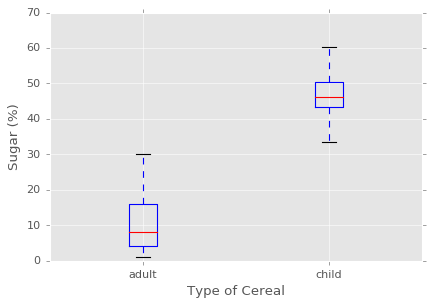

In [62]:
# Children's Cereal
c = [40.3, 55, 45.7, 43.3, 50.3, 53.5, 43, 44.2, 44, 47.4, 44, 33.6, 55.1, 48.8, 50.4, 37.8, 60.3, 46.6] # <- file
# c = [40.3, 55, 45.7, 43.3, 50.3, 45.9, 53.5, 43, 44.2, 44, 47.4, 44, 33.6, 55.1, 48.8, 50.4, 37.8, 60.3, 46.6] # <- book version

# Adults' Cereals
a = [20, 30.2, 2.2, 7.5, 22.2, 16.6, 14.5, 21.4, 3.3, 6.6, 7.8, 10.6, 16.2, 14.5, 4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 10, 1, 4.4, 1.3, 8.1, 4.7, 18.4] # <- file
#a = [20, 30.2, 2.2, 7.5, 4.4, 22.2, 16.6, 14.5, 21.4, 3.3, 6.6, 7.8, 10.6, 16.2, 14.5, 4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 10, 1, 4.4, 1.3, 8.1, 4.7, 18.4] # <- book version

nc = len(c)
yc = mean(c)
sc = stdev(c) #6.24718884147 #
print("children's: mean {}, stddev: {}, n: {}".format(yc, sc, nc))


na = len(a)
ya = mean(a)
sa = stdev(a) #7.47522011825 
print("adult's: mean {}, stddev: {}, n: {}".format(ya, sa, na))

# create a boxplot
plt.xlabel("Type of Cereal")
plt.ylabel("Sugar (%)")
plt.boxplot([a, c], labels=['adult', 'child']);

# assume randomly selected, 
# should be independent both internally (one cereal's content doesn't affect anothers) and across groups

diff = yc - ya
print("diff: {}".format(diff))

se = math.sqrt((sc ** 2 / nc) + (sa ** 2 / na))
df = degrees_freedom(sc, nc, sa, na)

print("df: {}".format(df))
tstar = t.ppf(0.975, df=df)

(diff - tstar * se, diff, diff + tstar * se)

In [35]:
# confirm via direct call 
t.interval(alpha=0.95, loc=diff, scale=se, df=df)

(32.494273007231655, 40.79858413562549)

## 24.15

### Answers

* NOTE: The data displayed in the book (and used for the answer generated in the key) is _slightly different_ from the data in the associated file!  I spent about an hour trying to figure out why the results I obtained were slightly different from those in the answer key.  Beware!

* some questions about assumptions -- they all have same teacher, in same class, so not clear whether they're truly independent; 
* hypotheses:
    * H0: mu(new) - mu(control) = 0
    * HA: mu(new) - mu(control) > 0
* pValue = 0.0168
* t = 2.207
* yes - the data supports the claim that the new activitly lead to better scores on average

In [60]:
new_activity = [24, 33, 43, 43, 43, 46, 49, 52, 53, 54, 56, 57, 58, 59, 61, 62, 67, 71]
#control = [10, 17, 20, 26, 28, 33, 37, 37, 41, 42, 42, 42, 43, 48, 53, 55, 55, 60, 62, 85]  # <- file version
control = [10, 17, 20, 26, 28, 33, 37, 37, 41, 42, 42, 42, 42, 42, 43, 48, 53, 55, 55, 60, 62, 85] # <- book version

yn = mean(new_activity)
sn = stdev(new_activity)
nn = len(new_activity)
print("yn: {}".format(yn))

yc = mean(control)
sc = stdev(control)
nc = len(control)
print("yc: {}".format(yc))

diff = yn - yc
print("diff: {}".format(diff))

se = math.sqrt(sn ** 2 / nn + sc ** 2 / nc)
print("se: {}".format(se))

df = degrees_freedom(sn, nn, sc, nc)
print("df: {}".format(df))

tcrit = diff / se
print("t*: {}".format(tcrit))

pValue = 1 - t.cdf(tcrit, df =df)
print("p-value: {}".format(pValue))

yn: 51.72222222222222
yc: 41.81818181818182
diff: 9.904040404040401
se: 4.487242309778091
df: 37.27648898155618
t*: 2.2071552459867467
p-value: 0.01676886185826776


## 24.17

### Answers

* a) see below
* b) see below
* c) no: looks like 10.5 is still within ~ 1.5 IQR for national, and is just beyond middle quartiles for american
* d) two CI's wouldn't factor in their combined variance

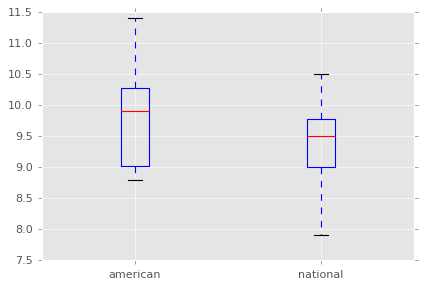

In [51]:
# a)
american = [11.4, 9.9, 10.5, 9.7, 10.5, 9.1, 10.3, 9.0, 10.2, 9.0, 10.0, 8.9, 9.9, 8.8]
national = [10.5, 9.5, 10.3, 9.4, 10.0, 9.1, 10.0, 9.0, 9.7, 9.0, 9.7, 8.9, 9.6, 8.9, 9.5, 7.9]

plt.boxplot([american, national], labels=['american', 'national']);

In [65]:
# b)
na = len(american)
ya = mean(american)
sa = stdev(american)

se = sa / math.sqrt(na)
tval = t.ppf(0.975, df=na-1)

(ya - tval * se, ya, ya + tval * se)

(9.35853226343524, 9.8, 10.241467736564761)

## 

### Answers

* 


## 

### Answers

* 


## 

### Answers

* 


## 

### Answers

* 


## 

### Answers

* 


## 

### Answers

* 
